# 당뇨병 수치 예측하기

앞에 했던 실습들을 바탕으로 당뇨병 수치도 한번 예측해봅시다!

앞에 했던 예제들은 아래와 같습니다.

- [맥북 중고 가격 예측하기](./Exploration5(1)-Macbook_price_prediction.ipynb)
- [팁 가격 예측하기](./Exploration5(2)-tip_prediction.ipynb)

## 1. 데이터 가져오기

데이터는 사이킷런 라이브러리에 있습니다.

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes

%matplotlib inline

diabetes = load_diabetes()
df = pd.DataFrame(diabetes.data, columns = diabetes.feature_names)
df['target'] = diabetes.target

In [46]:
df.head(10)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
5,-0.092695,-0.044642,-0.040696,-0.019442,-0.068991,-0.079288,0.041277,-0.076395,-0.041180,-0.096346,97.0
6,-0.045472,0.050680,-0.047163,-0.015999,-0.040096,-0.024800,0.000779,-0.039493,-0.062913,-0.038357,138.0
7,0.063504,0.050680,-0.001895,0.066630,0.090620,0.108914,0.022869,0.017703,-0.035817,0.003064,63.0
8,0.041708,0.050680,0.061696,-0.040099,-0.013953,0.006202,-0.028674,-0.002592,-0.014956,0.011349,110.0
9,-0.070900,-0.044642,0.039062,-0.033214,-0.012577,-0.034508,-0.024993,-0.002592,0.067736,-0.013504,310.0


데이터가 잘 불러와졌습니다. diatetes 의 데이터에는 10개의 칼럼이 있네요!

diabetes의 data를 df_X에, target을 df_y에 저장해줄까요?

In [47]:
df_X = diabetes.data
df_y = diabetes.target

## 모델에 입력할 데이터 x, y 준비하기

df_X와 df_y에 있는 값들을 Numpy array로 변환해서 저장해봅시다.

In [48]:
df_X = np.array(df_X)
df_y = np.array(df_y)

## train 데이터와 test 데이터로 분리하기

x와 y 데이터를 각각 train 데이터와 test 데이터로 분리해줍시다.

In [49]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df_X, df_y, test_size = 0.2, random_state = 42
)

In [18]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(353, 10) (353,)
(89, 10) (89,)


## 모델 준비하기

입력 데이터 개수에 맞는 가중치 `w`와 `b`를 준비하고 모델 함수를 구현해봅시다.

In [54]:
W = np.random.rand(10)
b = np.random.rand()

print(W, b)

[0.00470353 0.11569382 0.27470052 0.2528405  0.76965813 0.1767294
 0.32636566 0.41318476 0.59022205 0.34711335] 0.639032326246915


이제 모델을 준비해봅시다!

In [20]:
def model(X, W, b):
    predictions = 0
    for i in range(10):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions

## 손실함수 `loss` 정의하기

손실함수를 MSE 함수로 정의해봅시다.

In [21]:
def MSE(a, b):
    mse = ((a-b)**2).mean()
    return mse

In [22]:
def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L

## 기울기를 구하는 `gradient` 함수 구현하기

그럼 기울기를 구하는 gradient 함수를 구현해봅시다.

In [51]:
def gradient(X, W, b, y):
    # N은 가중치의 개수
    N = len(W)
    
    # y_pred 준비
    y_pred = model(X, W, b)
    
    # 공식에 맞게 gradient 계산
    dW = 1/N * 2 * X.T.dot(y_pred-y)
    
    # b의 gradient 계산
    db = 2 * (y_pred - y).mean()
    return dW, db

In [41]:
dW, db = gradient(X_train, W, b, y_train)
print("dW : ", dW)
print("db : ", db)

dW :  [-1.71816061e-13 -2.03411183e-13 -5.49407010e-13 -4.52390849e-13
  2.82406840e-13  3.31331807e-13  4.92588044e-13 -2.60300218e-13
 -4.91668117e-13 -3.35225014e-13]
db :  -1.377768531935052e-12


## 하이퍼 파라미터인 학습률을 설정하기

학습률을 0.01로 설정해봅시다.

In [37]:
LEARNING_RATE = 0.01

## 모델 학습하기

정의된 손실함수와 기울기 함수로 모델을 학습해줍시다.

loss값이 충분히 떨어질 때까지 학습을 진행해봅시다.

In [55]:
losses = []

for i in range(1, 20001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i%1000 == 0:
        print(i, "th loss : %0.4f" %(L))

1000 th loss : 2949.3078
2000 th loss : 2901.9321
3000 th loss : 2897.7077
4000 th loss : 2896.4738
5000 th loss : 2895.6011
6000 th loss : 2894.8012
7000 th loss : 2894.0327
8000 th loss : 2893.2885
9000 th loss : 2892.5666
10000 th loss : 2891.8661
11000 th loss : 2891.1863
12000 th loss : 2890.5266
13000 th loss : 2889.8862
14000 th loss : 2889.2646
15000 th loss : 2888.6612
16000 th loss : 2888.0755
17000 th loss : 2887.5069
18000 th loss : 2886.9549
19000 th loss : 2886.4190
20000 th loss : 2885.8987


흠 이런 결과나 나왔습니다. Loss 값이 꽤 크네요!

한번 그림을 그려 확인해봅시다.

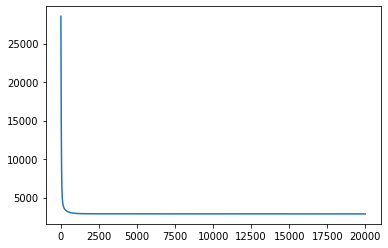

In [56]:
plt.plot(losses)
plt.show()

## 모델 성능 테스트

그럼 X_test 데이터와 y_test 데이터에서도 예측을 해볼까요?

In [57]:
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
mse

2886.2162935265906

mse가 꽤 큰 값을 가지는 것을 알 수 있습니다.

한번 시각화 해볼까요?

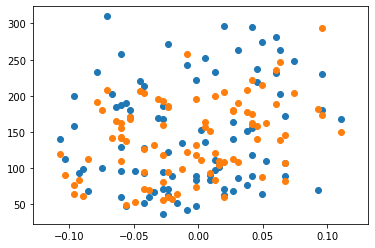

In [58]:
plt.scatter(X_test[:, 0], y_test)
plt.scatter(X_test[:, 0], prediction)
plt.show()

# 어떻게 하면 오차값을 줄일 수 있을까요?

우리의 문제를 한번 생각해봅시다. 무턱대로 일단 모델부터 만들어서 그런 것 같기도 해요!

다시 데이터를 불러와 생각해볼까요?

In [59]:
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220.0


diabetes 라는 데이터에는 총 10개의 column이 있습니다. 

- age : 나이
- sex : 성별
- bmi : BMI 지수
- bp : 평균 혈압
- s1 ~ s6 : 6종류의 혈액 검사 수치

target과 각 column에 상관관계가 있는지 확인하고싶어요.

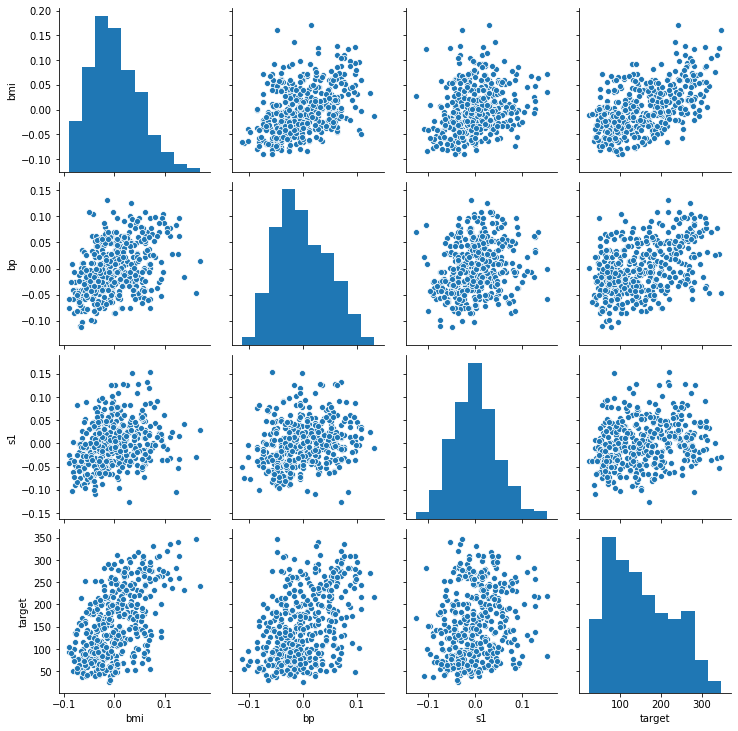

In [65]:
import seaborn as sns

sns.pairplot(df[['bmi', 'bp', 's1', 'target']])

bmi 지수와 평균 혈압에는 어떤 관계가 있는 것 같아 보입니다. 또한 BMI지수와 평균혈압이 종속변수인 당뇨병 진행도와도 상관관계가 있어보이는군요.

이렇게 독립변수끼리 상관관계를 가지고 있는 것을 **다중공선성**이라고 합니다. 다중 공선성은 회귀 분석 결과에 영향을 미칠 수 있어요! 

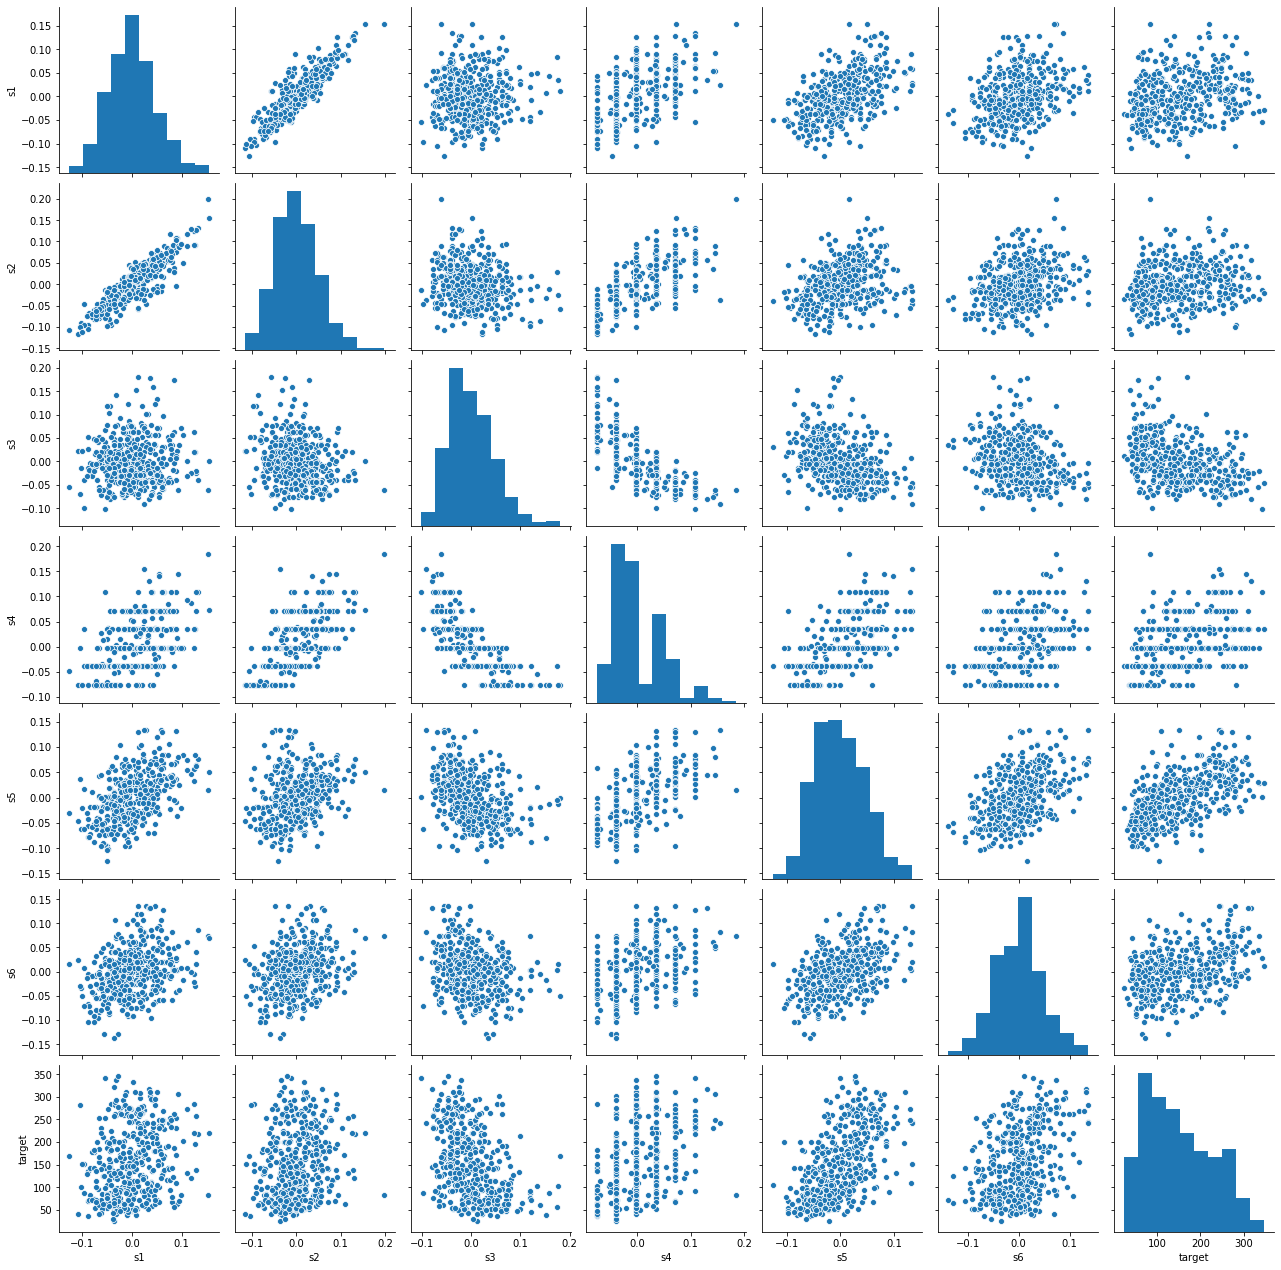

In [66]:
sns.pairplot(df[['s1', 's2', 's3', 's4', 's5', 's6', 'target']])

s1과 s2는 강한 상관관계를 보이고 있네요. target과 s3, s5도 강한 관계를 보이고 있는 것 같습니다. 

한번 변수를 줄여서 데이터를 다시 만들어 예측해봅시다.

In [69]:
new_df = df[['age', 'sex', 'bmi', 's1', 's3', 's4', 's5', 'target']]

In [70]:
new_X = new_df[['age', 'sex', 'bmi', 's1', 's3', 's4', 's5']]
new_y = new_df['target']

In [71]:
new_X = np.array(new_X)
new_y = np.array(new_y)

훈련 데이터와 테스트 데이터로 나누고 모델로 학습시켜봅시다.

In [73]:
X_train, X_test, y_train, y_test = train_test_split(
    new_X, new_y, test_size=0.2, random_state = 42
)

In [75]:
W = np.random.rand(7)
b = np.random.rand()

print(W, b)

[0.71099379 0.06243146 0.51697867 0.16567226 0.13319827 0.3274992
 0.63101802] 0.41655849262892697


In [77]:
def model(X, W, b):
    predictions = 0
    for i in range(len(W)):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions

In [78]:
new_losses = []

for i in range(1, 20001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    new_losses.append(L)
    if i%1000 == 0:
        print(i, "th loss : %0.4f" %(L))

1000 th loss : 3144.7573
2000 th loss : 3107.4482
3000 th loss : 3103.5982
4000 th loss : 3102.6594
5000 th loss : 3102.2103
6000 th loss : 3101.9060
7000 th loss : 3101.6770
8000 th loss : 3101.5005
9000 th loss : 3101.3636
10000 th loss : 3101.2574
11000 th loss : 3101.1749
12000 th loss : 3101.1108
13000 th loss : 3101.0611
14000 th loss : 3101.0225
15000 th loss : 3100.9925
16000 th loss : 3100.9692
17000 th loss : 3100.9512
18000 th loss : 3100.9371
19000 th loss : 3100.9262
20000 th loss : 3100.9178


In [79]:
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
mse

2944.4056133296776

별로 나아지진 않네요.. ^^; 그래도 한번 시각화를 해봅시다.

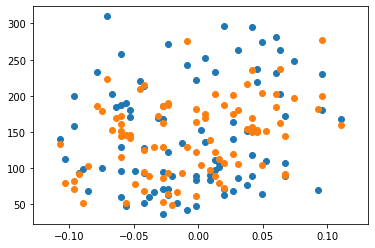

In [86]:
plt.scatter(X_test[:, 0], y_test)
plt.scatter(X_test[:, 0], prediction)
plt.show()